In [14]:
import pandas as pd
df = pd.read_csv('/content/Churn_Modelling.csv')
df.head()
# df.shape

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [15]:
df.info()
df['Exited'].value_counts()
df['Geography'].value_counts()
df['Gender'].value_counts()
df.duplicated().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


0

In [23]:
df.drop(columns = ['RowNumber','CustomerId','Surname'], inplace=True)
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


In [24]:
# One hot encoding
df = pd.get_dummies(df,columns=['Geography','Gender'], drop_first=True)
df.head()

KeyError: "None of [Index(['Geography', 'Gender'], dtype='object')] are in the [columns]"

In [25]:
# Scaling data to same order before training
from sklearn.model_selection import train_test_split
X = df.drop(columns = ['Exited'])
y = df['Exited']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)

In [26]:
X_test

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
9953,550,47,2,0.00,2,1,1,97057.28,0,0,1
3850,680,34,3,143292.95,1,1,0,66526.01,0,0,1
4962,531,42,2,0.00,2,0,1,90537.47,0,0,0
3886,710,34,8,147833.30,2,0,1,1561.58,1,0,1
5437,543,30,6,73481.05,1,1,1,176692.65,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...
3919,763,39,7,0.00,2,1,0,19458.75,0,1,0
162,800,49,7,108007.36,1,0,0,47125.11,0,0,0
7903,567,34,10,0.00,2,0,1,161571.79,0,1,1
2242,621,30,2,101014.08,2,1,1,165257.31,1,0,0


In [27]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

X_train_scaled


array([[-0.23082038, -0.94449979, -0.70174202, ...,  1.71490137,
        -0.57273139,  0.91509065],
       [-0.25150912, -0.94449979, -0.35520275, ..., -0.58312392,
        -0.57273139, -1.09278791],
       [-0.3963303 ,  0.77498705,  0.33787579, ...,  1.71490137,
        -0.57273139, -1.09278791],
       ...,
       [ 0.22433188,  0.58393295,  1.3774936 , ..., -0.58312392,
        -0.57273139, -1.09278791],
       [ 0.13123255,  0.01077067,  1.03095433, ..., -0.58312392,
        -0.57273139, -1.09278791],
       [ 1.1656695 ,  0.29735181,  0.33787579, ...,  1.71490137,
        -0.57273139,  0.91509065]])

In [28]:
# model building
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense

In [29]:
model = Sequential()

# # input layer in neural network with 3 nodes
# model.add(Dense(3,activation='sigmoid',input_dim=11))

# # output layer with 1 node
# model.add(Dense(1,activation='sigmoid'))

# AFETR UPDATES

# input layer in neural network with 3 nodes
model.add(Dense(11,activation='relu',input_dim=11))
model.add(Dense(11,activation='relu'))

# output layer with 1 node
model.add(Dense(1,activation='sigmoid'))

In [30]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 11)                132       
                                                                 
 dense_4 (Dense)             (None, 11)                132       
                                                                 
 dense_5 (Dense)             (None, 1)                 12        
                                                                 
Total params: 276 (1.08 KB)
Trainable params: 276 (1.08 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [31]:
# Compiling the mdoel(defining the losses, optimizers, etc.)
model.compile(loss='binary_crossentropy', optimizer='Adam', metrics = ['accuracy'])

In [32]:
# running the model on training data to calculate weights and biases
# Adding validation_split so the model internally splits the already splitted 80% data into further 20% and 80% and calcualtes their accuracy in each epoch
history = model.fit(X_train_scaled,y_train,epochs=100,validation_split=0.2)
# Storing epochs in a dictionary 'history' used for plotting

Epoch 1/100
200/200 [==============================] - 3s 4ms/step - loss: 0.5116 - accuracy: 0.7763 - val_loss: 0.4791 - val_accuracy: 0.8037
Epoch 2/100
200/200 [==============================] - 1s 3ms/step - loss: 0.4563 - accuracy: 0.8009 - val_loss: 0.4534 - val_accuracy: 0.8131
Epoch 3/100
200/200 [==============================] - 1s 4ms/step - loss: 0.4394 - accuracy: 0.8028 - val_loss: 0.4403 - val_accuracy: 0.8150
Epoch 4/100
200/200 [==============================] - 1s 4ms/step - loss: 0.4304 - accuracy: 0.8073 - val_loss: 0.4330 - val_accuracy: 0.8169
Epoch 5/100
200/200 [==============================] - 1s 4ms/step - loss: 0.4250 - accuracy: 0.8128 - val_loss: 0.4267 - val_accuracy: 0.8175
Epoch 6/100
200/200 [==============================] - 1s 3ms/step - loss: 0.4198 - accuracy: 0.8209 - val_loss: 0.4215 - val_accuracy: 0.8194
Epoch 7/100
200/200 [==============================] - 1s 3ms/step - loss: 0.4147 - accuracy: 0.8234 - val_loss: 0.4184 - val_accuracy: 0.8225

In [33]:
# 11 * 3 weigths and 3 biases
model.layers[0].get_weights()

[array([[ 0.23319882,  0.05950483, -0.2741245 ,  0.3558133 ,  0.0849459 ,
          0.182165  ,  0.07964427,  0.18433747,  0.16320856, -0.10286034,
         -0.07369368],
        [-0.7843589 , -0.6944086 , -0.42078686,  0.34865063,  0.02832166,
         -0.04030795, -0.418364  , -0.77049875,  0.08022442, -0.15683833,
          0.6023972 ],
        [-0.12850139, -0.10078046,  0.12688473, -0.35131687, -0.11880939,
          0.01322787, -0.09162688,  0.00714527, -0.07697394,  0.11947176,
          0.29556808],
        [ 0.7807283 ,  0.05440785, -0.45479977, -0.05042294, -0.11068127,
         -0.5959516 , -0.05970075, -0.5515755 ,  0.40029433, -0.19704668,
         -0.16288234],
        [-0.5114954 ,  0.01236091, -0.25952214, -0.00498384, -1.310956  ,
          0.54701084,  0.10534188, -0.25954163,  1.2725213 ,  0.43528208,
         -0.01352556],
        [ 0.15234053,  0.03675307, -0.13112614, -0.3552205 ,  0.03764812,
         -0.80443823,  0.38852236,  0.1052288 ,  0.06685589,  0.2966456

In [34]:
  # 3 * 1 weights and 1 bias
model.layers[1].get_weights()

[array([[-6.44183576e-01, -1.69045091e-01,  4.60475415e-01,
         -2.14339301e-01,  5.38981140e-01, -1.79224059e-01,
         -5.44794619e-01,  2.06161663e-01, -5.33809960e-01,
         -2.36225039e-01,  4.13724482e-01],
        [ 1.94835410e-01, -2.25627676e-01,  6.56305730e-01,
         -1.13885367e+00, -8.04222673e-02, -1.58400387e-01,
          7.50338674e-01,  7.47054160e-01, -3.07945549e-01,
         -7.78936744e-01, -3.85448366e-01],
        [ 6.30349159e-01, -4.12299722e-01, -2.35710010e-01,
          1.19671345e-01,  1.37059063e-01, -1.92462541e-02,
          1.69056639e-01, -1.07510313e-01,  5.90635836e-01,
          4.74046804e-02,  1.49113014e-01],
        [-5.36347449e-01,  3.76608461e-01, -4.51162249e-01,
          1.42146042e-03,  5.59757352e-01,  2.01341853e-01,
          4.14297849e-01,  3.24941836e-02,  1.89353470e-02,
         -1.28044918e-01,  3.50139625e-02],
        [-3.64531815e-01, -3.88137728e-01, -5.10134637e-01,
          8.69382203e-01, -3.68229747e-01,  

In [35]:
# prediction on testing data(returns the predictions as probabilities between 0 and 1 due to 'sigmoid')
y_log = model.predict(X_test_scaled)

63/63 [==============================] - 0s 2ms/step


In [36]:
# Converting probabilites into binary by taking 0.5 as threshold(above 50% 1 below 0)
import numpy as np
y_pred = np.where(y_log > 0.5,1,0)
y_pred

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])

In [37]:
# Checking the accuracy score
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.8565

In [38]:
# Changes in the neural network for better accuracy:
# 1) Change the activation to 'relu'
# 2) Add one more hidden layer
# 3) Increase the number of nodes on these hidden layers
# 4) Increase the number of epochs

In [39]:
import matplotlib.pyplot as plt
history.history
# this is a dictionary with 4 key-value pairs

{'loss': [0.5115620493888855,
  0.4562976062297821,
  0.43943679332733154,
  0.4304032623767853,
  0.4250345528125763,
  0.4197689890861511,
  0.41470518708229065,
  0.41030997037887573,
  0.40415745973587036,
  0.39765605330467224,
  0.39088302850723267,
  0.3828836679458618,
  0.37419989705085754,
  0.3675491213798523,
  0.36180853843688965,
  0.35729777812957764,
  0.35286152362823486,
  0.34918639063835144,
  0.3473569452762604,
  0.3457542657852173,
  0.34352701902389526,
  0.34217819571495056,
  0.34115830063819885,
  0.3402921259403229,
  0.3388715088367462,
  0.33884596824645996,
  0.337128221988678,
  0.3374367952346802,
  0.33671626448631287,
  0.3361838161945343,
  0.3350706100463867,
  0.3350309133529663,
  0.33479252457618713,
  0.33443763852119446,
  0.334034264087677,
  0.33355534076690674,
  0.3329392969608307,
  0.33330783247947693,
  0.3322857618331909,
  0.33153820037841797,
  0.3318330645561218,
  0.3311763107776642,
  0.33116355538368225,
  0.33060139417648315,
  0

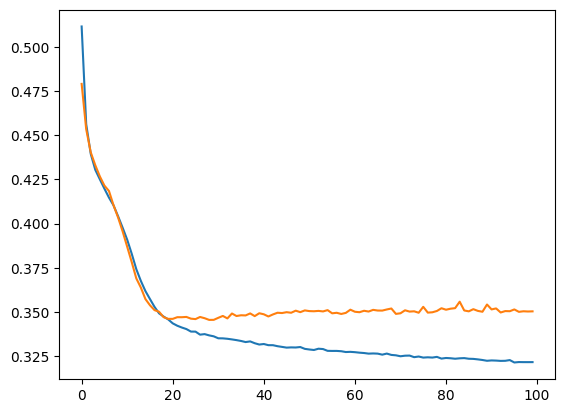

In [42]:
# Plotting these key-value pairs as graphs to visualize the working of model as it runs through epochs
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

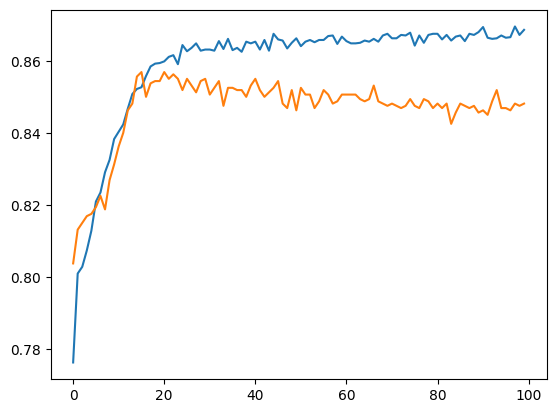

In [43]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])